In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston

## カテゴリ特徴量（離散値特徴量）

- 連続値ではなく、カテゴリを分けるような特徴量
    - ex) 製品のブランド、　色、　販売されている部門　etc...
- このような変数をそのまま分類器にかけることはできない

## 特徴量エンジニアリング（feature engineering）

- 特定のアプリケーションに対して、最良のデータ表現を模索することをいう
- 教師あり学習においては、データを正しく表現することが、パラメータを適切に選ぶことより大きな影響を及ぼすこともある

### ワンホットエンコーディング

- カテゴリ変数を表現する方法として非常にポピュラー
- ダミー変数と呼ばれることもある
- カテゴリ変数を1つ以上の０と１をもつ新しい特徴量で置き換える（列を増やして対応する）

In [5]:
import os

# このファイルにはコラム名を含んだヘッダがないので、header=Noneを指定し、
# コラム名を"names"で明示的に指定
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                  'marital-status', 'occupation', 'relationship', 'race', 'gender',
                  'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

# 解説のために、いくつかのカラムだけを選択
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [6]:
#　文字列で表されているカテゴリーデータのチェック
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [8]:
# get_dummies関数を使って簡単にデータをワンホットエンコーディングする
print("Original features: \n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies: \n", list(data_dummies.columns))

Original features: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op

In [9]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
# ターゲット変数を分離させる
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Numpy配列を取り出す
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [14]:
# いつものようにモデルを学習させ、予測させる
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


In [15]:
# 整数データとして保存されているが、実態はカテゴリ変数という場合
demo_df = pd.DataFrame({'Integer Feature': [0,1,2,1],
                       'Categorical Feature': ['sock', 'fox', 'sock', 'box']})
display(demo_df)

,Categorical Feature,Integer Feature
0,sock,0
1,fox,1
2,sock,2
3,box,1


In [16]:
# get_dummiesを実行しても、整数特徴量は変化しない
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_sock
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [17]:
#  columnsパラメータで明示的に指定する必要がある
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_sock
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


- 最良のデータ表現方法は、データの意味だけでなく、利用する機械学習モデルにも依存する

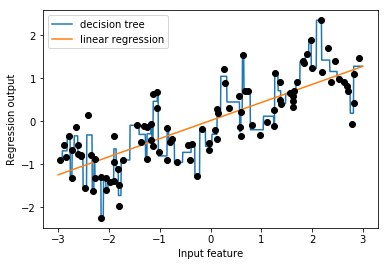

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

### ビニング（binning）、離散化（discretization）

- 線形モデルを連続データに対してより強力にする方法
- 特徴量を複数に分割する

- 特徴量の入力レンジを固定数のビン（ここでは-3から3）に分割することを考える
- データポイントはどのビンに分類されたかで表現される
- これには、まずビンを定義しなければならない
- -3から3までを等間隔に区切る

In [23]:
# 11のエントリを作り、ビンは2つの連続する境界の間に10のビンを作る
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


- 最初のビンには-3から-2.4までの全ての数が入り、次のビンには-2.4から-1.8までの全ての数が入る
- 次に、個々のデータポイントがどのビンに入るのかを記録する

In [25]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


- ここまでで、waveデータセットの単一の連続値入力特徴量をカテゴリ特徴量に置き換えられた
- このデータをscikit-learnに適用させるためには、ワンホットエンコーディングに変換する必要がある

In [27]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoderで変換する
encoder = OneHotEncoder(sparse=False)
# encoder.fitでwhich_binに現れる整数値のバリエーションを確認
encoder.fit(which_bin)
# transformでワンホットエンコーディングを行う
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [28]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


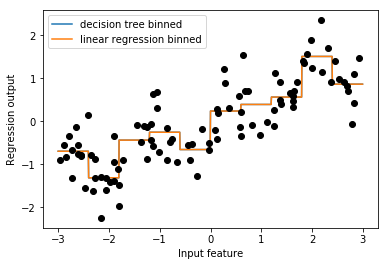

In [30]:
# 線形回帰モデルと決定木モデルをこのワンホットエンコーディングデータに対して作り直す
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="decision tree binned")

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="linear regression binned")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

- 二つの線が完全に重なっていて、線形回帰と決定木が全く同じ予測を行うことがわかる
- ビニングしたことで、線形モデルの柔軟さが増している
- 反対に、決定木は柔軟性が低下した
- あるデータセットに対して、どうしても線形モデルを使いたい場合、いくつかの特徴量と出力が非線形な関係を持つなら、ビニングをすると、モデルの表現力を高めることができる

### 交互作用特徴量（interaction feature）と多項式特徴量（polynomial feature）

In [35]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


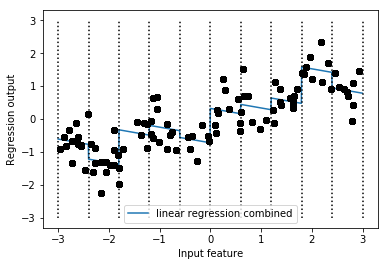

In [36]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    plt.legend(loc='best')
    plt.ylabel("Regression output")
    plt.xlabel("Input feature")
    plt.plot(X[:, 0], y, 'o', c='k')

- この例では、モデルは個々のビンに対してオフセットと傾きを学習する
- 傾きは全て下向きで、全てのビンで共有されている
- それぞれのビンで傾きを出すには、データポイントがどのビンに入っているかを示す特徴量とx軸のどこにあるかを示す特徴量の交互作用もしくは積を特徴量として加えれば良い

In [37]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


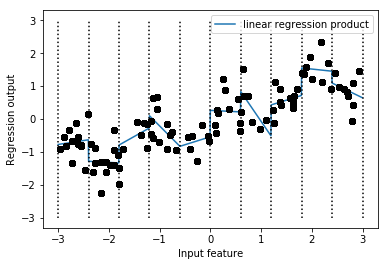

In [39]:
reg = LinearRegression().fit(X_product, y)

line_combined = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    plt.legend(loc='best')
    plt.ylabel("Regression output")
    plt.xlabel("Input feature")
    plt.plot(X[:, 0], y, 'o', c='k')

- ビニング以外に、特徴量を拡張する方法として、多項式を使う方法がある

In [41]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10までの多項式を加える
# デフォルトの"include_bias=Trueだと、常に1になる特徴量を加える"
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [42]:
# 10次を指定すると、10の特徴量ができる
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [43]:
print("Entries of X: \n {}".format(X[:5]))
print("Entries of X_poly: \n {}".format(X_poly[:5]))

Entries of X: 
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly: 
 [[ -7.52759287e-01   5.66646544e-01  -4.26548448e-01   3.21088306e-01
   -2.41702204e-01   1.81943579e-01  -1.36959719e-01   1.03097700e-01
   -7.76077513e-02   5.84199555e-02]
 [  2.70428584e+00   7.31316190e+00   1.97768801e+01   5.34823369e+01
    1.44631526e+02   3.91124988e+02   1.05771377e+03   2.86036036e+03
    7.73523202e+03   2.09182784e+04]
 [  1.39196365e+00   1.93756281e+00   2.69701700e+00   3.75414962e+00
    5.22563982e+00   7.27390068e+00   1.01250053e+01   1.40936394e+01
    1.96178338e+01   2.73073115e+01]
 [  5.91950905e-01   3.50405874e-01   2.07423074e-01   1.22784277e-01
    7.26822637e-02   4.30243318e-02   2.54682921e-02   1.50759786e-02
    8.92423917e-03   5.28271146e-03]
 [ -2.06388816e+00   4.25963433e+00  -8.79140884e+00   1.81444846e+01
   -3.74481869e+01   7.72888694e+01  -1.59515582e+02   3.29222321e+02
   -6.79478050e+02   1.40236670e+03]]


In [44]:
# 特徴量の意味を見てみる
print("Polynomial feature names: \n {}".format(poly.get_feature_names()))

Polynomial feature names: 
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


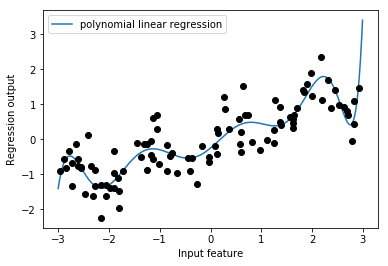

In [49]:
# 線形回帰と組み合わせると、多項式回帰になる（polynomial regression）
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

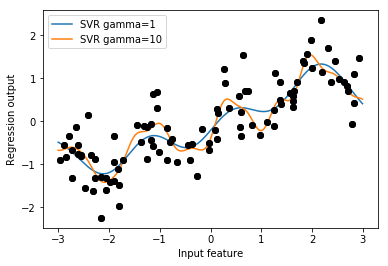

In [51]:
# 高次の多項式は、境界近辺やデータが少ない領域で極端な振る舞いを示す傾向がある
# 比較として、カーネル法を用いたSVMモデルを適用してみる

from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    plt.plot(X[:, 0], y, 'o', c="k")
    plt.ylabel("Regression output")
    plt.xlabel("Input feature")
    plt.legend(loc="best")

- 現実的なデータ(boston_housing)に交互作用特徴量と多項式特徴量を適用してみる

In [52]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

#データのスケール変換
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# 二次までの多項式特徴量と交互作用を抽出しよう
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [55]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interaction: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interaction: 0.753


- Ridgeモデルの性能を明らかに押し上げている
- しかし、ランダムフォレストのような複雑なモデルを使う場合は話が変わってくる

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.808
Score with interactions: 0.794


### 単変量非線形変換

- 特定の特徴量に有用であることがわかっている変換が他にもある
- log, exp, sinなどの数学関数を用いるもの
- 線形モデルやニューラルネットワークは、特徴量のスケールや分散と密接に結びついており、特徴量とターゲットに非線形関係があると、モデリングが難しくなる
- ほとんどのモデルは、個々の特徴量がガウス分布（正規分布）にしたがっているときに最もうまくいく

In [60]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [66]:
# 第１特徴量の最初の10エントリを見てみる。出現回数を数えて、分布を明らかにする
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


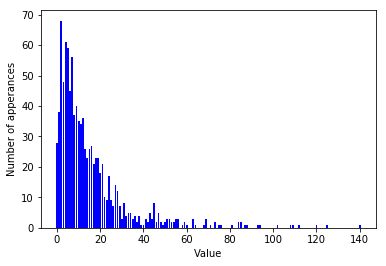

In [69]:
# 可視化する
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Number of apperances")
plt.xlabel("Value")

- この種の分布（小さい値が多く、稀にとても大きな値がある）は、実データでよくあるものの、線形モデルではうまく扱えない

In [70]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("test score: {}".format(score))

test score: 0.6224186236310756


- 対数変換を行うと、結果が変わってくる
- データの値に０があるため、log(x + 1)で計算する

In [71]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

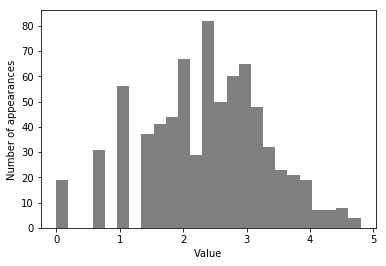

In [72]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [73]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("test score: {}".format(score))

test score: 0.8749342372887815


## 自動特徴量選択

- どうしたら良い特徴量がわかるのか？
- 基本的な3つの戦略
    - 単変量統計(univariate statistics)
    - モデルベース選択(model-based selection)
    - 反復選択(iterative selection)

### 単変量統計

- ここの特徴量とターゲットの間に統計的に顕著な関係があるかどうかを計算する
- 最も確信度が高く関連している特徴量が選択される
- クラス分類の場合は、分散分析（analysis of variance : ANOVA）として知られる手法
- 個々の特徴量を個別に考慮するのが特徴（単変量）
    - 他の特徴量と組み合わさって意味を持つような特徴量は捨てられる
- scikit-learnで使うには、テストを選択する必要がある
- テストで求められるp値を元に、特徴量を捨てる方法も指定

In [3]:
# ノイズも入れつつ試してみる。うまくいけば、ノイズを弾き出してくれるはず

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# シードを指定して乱数を決定
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# ノイズ特徴量をデータに加える
#最初の30特徴量はデータセットからきたもの、続く50特徴量はノイズ
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(デフォルト)とSelectPercentileを使って50%の特徴量を選択
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# 訓練セットを変換
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


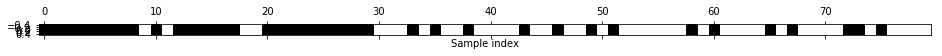

In [5]:
# どの特徴量が使われたのか見てみる
mask = select.get_support()
print(mask)
#マスクを可視化する 黒が真、白が偽
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [8]:
# 選択された特徴量だけを使う場合と、全ての特徴量を使う場合で、ロジスティック回帰の精度を比較する

from sklearn.linear_model import LogisticRegression

# テストデータの変換
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Score with selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with selected features: 0.940


### モデルベース特徴量選択

- 教師あり学習モデルを用いて個々の特徴量の重要性を判断し、特徴量を選別する方法
- 特徴選択に用いる学習モデルは、最終的に使用する教師あり学習モデルと異なっていても良い

In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median')

- SelectFromModelクラスは、教師あり学習モデルで得られた特徴量の重要性が、指定したスレッショルドよりも大きい特徴量だけを選択する

In [11]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


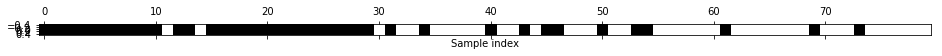

In [12]:
# 選択された特徴量を見てみる
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [13]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("test score: {:.3f}".format(score))

test score: 0.951


### 反復時特徴量選択

- 異なる特徴量を用いた一連のモデルを作る
    - 全く特徴量を使わないところから、ある基準が満たされるところまで一つずつ特徴量を加えていく方法
    - 全ての特徴量を使う状態から一つずつ特徴量を取り除いていく方法
- 正規的特徴量削減（recursive feature elimination : RFE）
    - 全ての特徴量から開始してモデルを作り、そのモデルで最も重要度が低い特徴量を削除する
    - そしてまたモデルを作り、一番重要度の低い特徴量を削除する
    - 事前に決めた特徴量の数になるまで、この過程を繰り返す
    -  これが機能するためには、モデルベース選択の場合と同様に、選択に用いるモデルが特徴量の重要性を決定する方法を提供していなければならない
    - ここではランダムフォレストを用いる

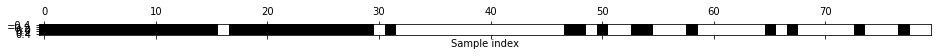

In [14]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
            n_features_to_select=40)

select.fit(X_train, y_train)
#選択された特徴量を可視化する
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [15]:
#RFEを用いて選択した特徴量を用いたロジスティック回帰モデルの精度を見てみる
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("test score: {:.3f}".format(score))

test score: 0.951


In [16]:
# RFEの内部で用いられたモデルを用いて予測を行うこともできる
print("test score: {:.3f}".format(select.score(X_test, y_test)))

test score: 0.951
